# Projeto 4 - Álgebra Linear Numérica.
# Alunos:
- Matheus Vilarino de Souza Pinto. 241708015
- Beatriz dos Santos Marques. 241708040

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import linregress
import random

# Questão 1.


## a)



In [72]:
def gaussianMatrix(m : int, n: int) -> torch.tensor:
    """Retorna um torch.tensor de dimensão (m x n) e entradas seguindo uma distribuição normal(0,1) 

    Args:
        m (int): número de linhas
        n (int): número de colunas

    Returns:
        torch.tensor: A matriz 
    """
    M = torch.randn(size=(m,n))
    return M

## b)


## c) A distribuição do máximo.

In [73]:
def plot_hist_max(K, m, n, xlim=(0,1)):
    max_cos_abs_list = []
    for _ in range(K):
        A = gaussianMatrix(m=m, n=n)
        A_norm = A / torch.norm(A, dim=0)
        
        cos_matrix = torch.matmul(A_norm.T, A_norm)
        cos_matrix_abs = torch.abs(cos_matrix)
        cos_matrix_abs.fill_diagonal_(0)
        
        max_cos = torch.max(cos_matrix_abs)
        max_cos_abs_list.append(max_cos.item())

    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(10,4))
    plt.title(f'Máximo de Cosseno Entre Colunas Para {K} Matrizes {m} x {n}')
    plt.hist(max_cos_abs_list, density=True, alpha=0.75, edgecolor='black', label='his')
    plt.ylabel("Densidade")
    plt.xlabel("Valor do máximo entre os absolutos dos cossenos")
    if xlim != None: plt.xlim(xlim)
    plt.grid(alpha=0.6)
    plt.style.use('default')
    plt.legend(edgecolor='0.9')
    plt.show()

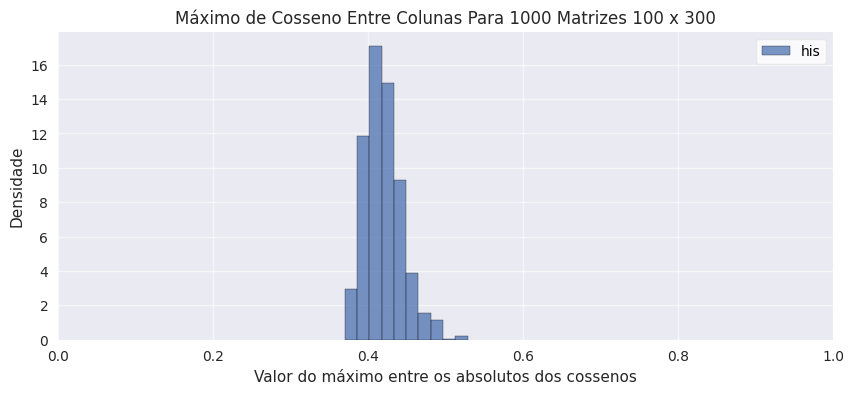

In [74]:
K_c = 1000
m_c = 100
n_c = 300
plot_hist_max(K_c, m_c, n_c)

## d) Complexidade de Calcular o Máximo acima.


- Tendo em vista que a multiplicação entre matrizes é o termo dominante me questão de complexidade computacional, a complexidade do algoritmo acima é de $K_c\times O(m_cn_c^2)$

## e)


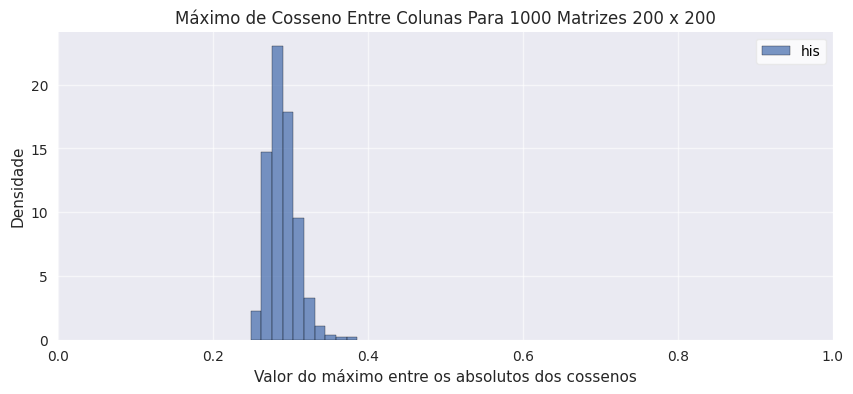

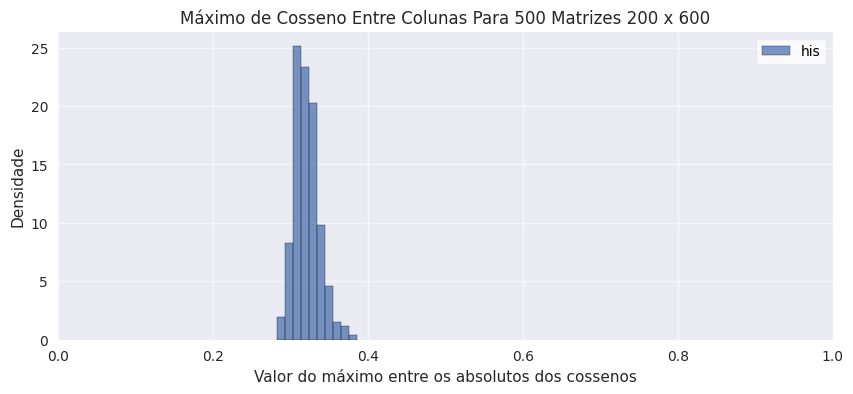

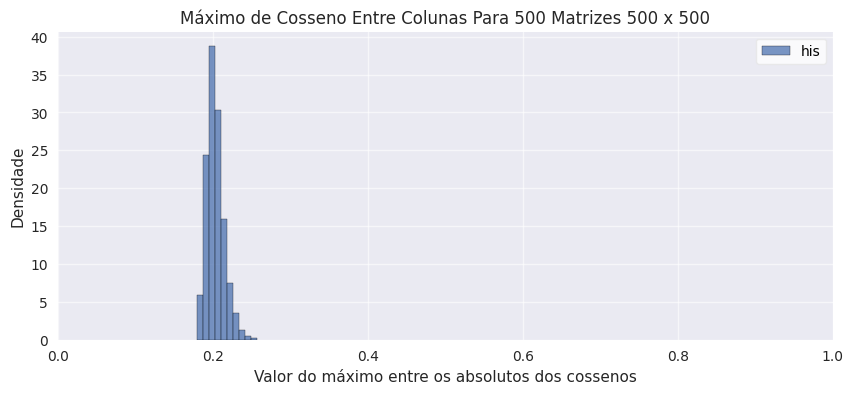

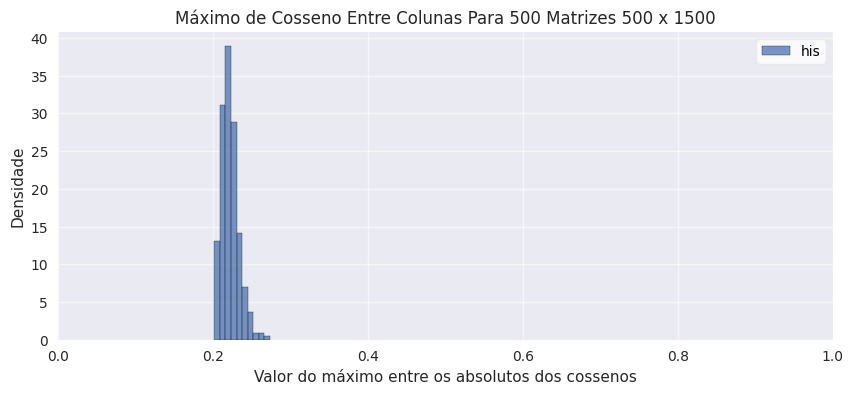

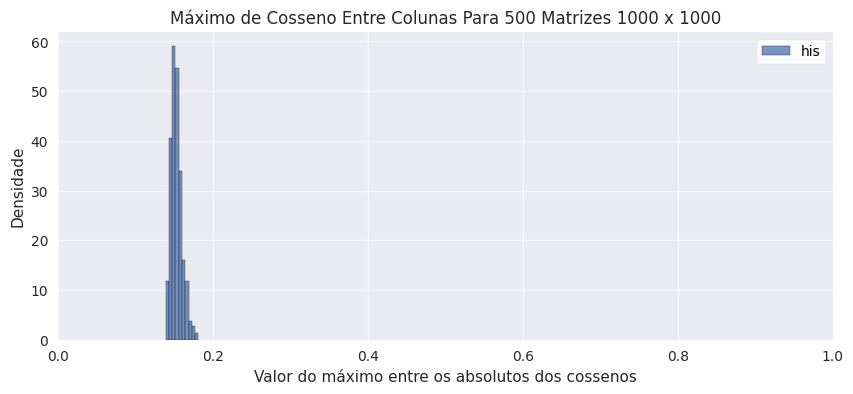

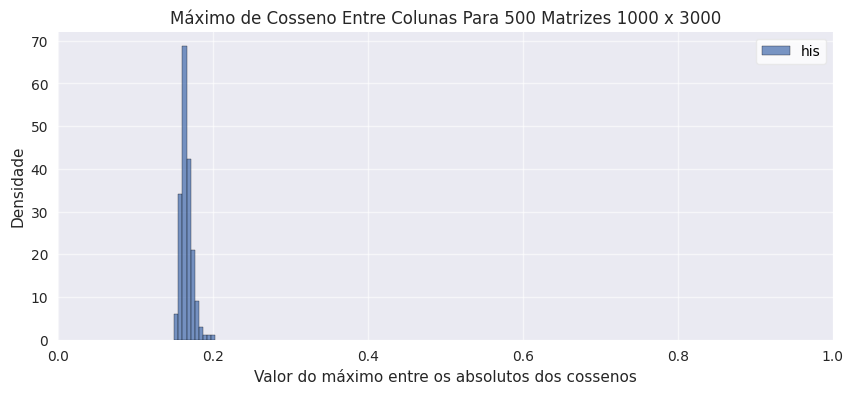

In [77]:
for m_e, n_e in [(200, 200), (200, 600), (500, 500), (500,1500), (1000,1000), (1000,3000)]:
    if m_e*n_e < 1e5:
        K = 1000
    else:
        K = 500
    plot_hist_max(K, m_e, n_e)
    